### Instituto Tecnologico de Costa Rica (ITCR)
### Sede Interuniversitaria de Alajuela
### Escuela de Computacion
### Curso: Inteligencia Artificial
### Estudiantes: 

 - Brandon Ledezma Fernández - 2018185574
 - Walter Morales Vásquez - 2018212846

### Profesora:
 
 - Maria Auxiliadora Mora

# Tarea Programada Número 5
---
#### Introducción:
<div style='text-align: justify;'> 
En este trabajo práctico se aplicarán conceptos básicos de aprendizaje automático
utilizando algoritmos no supervisados.
</div>
<div style='text-align: justify;'>
Los estudiantes deberán realizar dos ejercicios. El primero consiste en implementar de cero los algoritmos de K-Means y DBSCAN. El segundo ejercicio consiste en aplicar los algoritmos de clustering a datos del Organismo de Investigación Judicial (OIJ) integrados con indicadores socio-económicos generados por el Instituto Nacional de Estadística y Censos de Costa Rica (INEC) para hacer un estudio muy simplificado sobre la criminalidad en el país.
</div>
<div style='text-align: justify;'>
El objetivo del trabajo es poner en práctica el conocimiento adquirido durante el
curso sobre clustering por medio de ejercicios prácticos que permitan al estudiante
experimentar con un ejemplo de uso.
</div>

In [26]:
import math
import random
import matplotlib.pyplot as plt

## Ejercicio 1. Implemente de cero los algoritmos K-Means y DBSCAN. 

1. (10 puntos) Implemente de cero el algoritmo de K-Means para vectores de atributos
de cualquier dimensión sin utilizar ninguna implementación de biblioteca. 

In [61]:
def encontrar_min_max(elementos):
    
    elem_min = [math.inf for i in range(len(elementos))]
    elem_max = [-math.inf for i in range(len(elementos))]
    
    for elem in elementos:
        for cols in range(len(elem)):
            if elem[cols] > elem_max[cols]:
                elem_max[cols] = elem[cols]
                
            if elem[cols] < elem_min[cols]:
                elem_min[cols] = elem[cols]
            
    return (elem_min, elem_max)

def inicializar_medias(elementos, k, elem_min, elem_max):
    
    # Initialize means to random numbers between
    # the min and max of each column/feature 
    cols = len(elementos[0]) # number of features
    medias = [[0 for j in range(cols)] for i in range(k)]
    
    for media in medias:
        for i in range(len(media)):
            
            # Set value to a random float
            # (adding +-1 to avoid a wide placement of a mean)
            media[i] = random.uniform(elem_min[i]+1, elem_max[i]-1);
    
    return medias
    
def distancia_euclidiana(x, y):
    
    resultado = 0 # The sum of the squared differences of the elements
    
    for i in range(len(x)):
        resultado += (x[i]-y[i])**2
        
    # The square root of the sum
    return resultado

def clasificar(medias, elem):
    
    # Classify item to the mean with minimum distance
    minimo = math.inf
    index = -1

    for i in range(len(medias)):
        
        # Find distance from item to mean
        dis = distancia_euclidiana(elem, medias[i])
        
        if minimo > dis:
            minimo = dis
            index = i
            
    return index
    
def actualizar_media(cantidad, medias, elem):
    
    for i in range(len(medias)):
        m = medias[i]
        m = (m*(cantidad-1)+elem[i])/float(cantidad)
        medias[i] = round(m, 4)
      
    return medias

def k_medias(k, elementos, epocas=100000):
    
    # Find the minima and maxima for columns
    elem_min, elem_max = encontrar_min_max(elementos)
    
    # Initialize means at random points
    medias = inicializar_medias(elementos, k, elem_min, elem_max)
    
    # Initialize clusters, the array to hold
    # the number of items in a class
    cantidad_en_clusters= [0 for i in range(len(medias))]
    
    # An array to hold the cluster an item is in
    pertenece = [0 for i in range(len(elementos))]
    
    # Calculate means
    for e in range(epocas):
        # If no change of cluster occurs, halt
        sin_cambio = True;
        for i in range(len(elementos)):
            
            elem = elementos[i]
            
            # Classify item into a cluster and update the
            # corresponding means.        
            index = clasificar(medias, elem)
#             print(index)
            
            cantidad_en_clusters[index] += 1
            cantidad = cantidad_en_clusters[index]
            medias[index] = actualizar_media(cantidad, medias[index], elem)
            
            # Item changed cluster
            if(elem != pertenece[i]):
                noChange = False
  
            pertenece[i] = index
    
#         print(e, pertenece)
        # Nothing changed, return
        if (noChange):
            break
    
    return medias, pertenece

2. (15 puntos) Implemente de cero el algoritmo DBSCAN.

In [46]:
# def k_medias(m, r, elementos, epocas=100000):
    
    

3. (2 puntos) Pruebe ambos algoritmos con datos generados artificialmente.

In [47]:
def generar_datos(cant_datos, cant_cols, maximo, minimo):
    
    resultado = [[random.uniform(minimo, maximo) for j in range(cant_cols)] for i in range(cant_datos)]
    
    return resultado

cant_datos = 100
cant_cols = 2
maximo = 20
minimo = 0

datos = generar_datos(cant_datos, cant_cols, maximo, minimo)

print(datos)

[[16.659597468154622, 10.324843325239685], [8.980112623662768, 17.100727868450672], [2.0729739504608458, 3.07078932258231], [19.341126301138466, 1.5470517857792387], [17.6960894416388, 19.691376566010472], [15.3025525854458, 5.2552305907845165], [13.812089073252201, 19.142284190008642], [19.373111415827815, 9.340465700307266], [2.6298545610718738, 6.647931310205828], [0.6751542920073406, 17.62147140803261], [7.5147607383419786, 19.998006793971886], [8.966770914322126, 16.36842425901883], [14.398947407678316, 18.138317936910617], [19.35642061532945, 17.691816938646753], [7.012924977186921, 18.818476676335408], [18.60999852481474, 16.295134820414386], [13.234046712265377, 11.46776638924229], [1.8711509144832705, 4.706928858734216], [6.5458009716608405, 10.098152044986161], [12.093570561993964, 12.542087663096751], [13.463765119304721, 1.99484177405157], [6.423404360759619, 1.8452855294444515], [17.44881936478666, 18.770362902157487], [18.92245354136408, 11.2198711945545], [6.337810277931

In [62]:
k = 3
epocas = 1000

medias, pertenece = k_medias(k, datos, epocas)

print(medias)

[[8.729, 16.3446], [4.3978, 5.6842], [16.6202, 8.8219]]


4. (3 puntos) Visualice ambos resultados. 

[2, 0, 1, 2, 0, 2, 0, 2, 1, 0, 0, 0, 0, 2, 0, 2, 2, 1, 1, 0, 2, 1, 0, 2, 0, 2, 1, 2, 0, 0, 0, 0, 1, 0, 1, 1, 1, 2, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 1, 0, 2, 1, 0, 1, 0, 1, 0, 2, 2, 1, 0, 0, 2, 2]


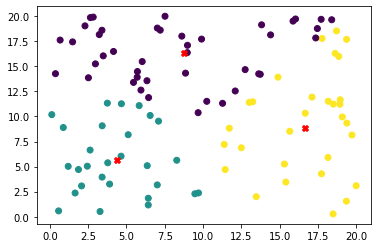

In [64]:
x = [elem[0] for elem in datos]
y = [elem[1] for elem in datos]

x_means = [elem[0] for elem in medias]
y_means = [elem[1] for elem in medias]

print(pertenece)

# Se grafican las clases junto con la línea que los divide.
plt.figure()
plt.title('')
plt.scatter(x, y, marker="o", c=pertenece)
plt.scatter(x_means, y_means, marker="X", c="red")
#plt.plot(SamplesAll.numpy(), Y.numpy(), "r-")
plt.show()

## Ejercicio 2. Aplicación de los algoritmos de clustering implementados para caracterizar la criminalidad en Costa Rica a partir de datos del OIJ y el INEC.
---
<div style='text-align: justify;'>
Objetivo: El objetivo del presente ejercicio es utilizar datos de criminalidad en Costa Rica
combinados con datos socio-económicos asociados a distritos para demostrar cuán
efectivos y precisos pueden ser los algoritmos de clustering en la definición de perfiles de
criminalidad por distrito a nivel nacional. El presente ejercicio utilizará datos numéricos
únicamente para tipificar de forma muy simplificada (utilizando dos características) los
distritos por cantidad de delitos y tasa de desempleo abierto.
</div>

1. (4 puntos) Baje los siguientes conjuntos de datos, publicados por las siguientes
instituciones nacionales, intégrelos por medio del nombre del distrito y
preprocéselos para el ejercicio (documente muy bien todo el proceso).
Para ambos conjuntos de datos baje los datos para todas las provincias, cantones
y distritos y asegúrese que los datos están limpios antes de hacer el join por distrito
para asegurarse que la mínima cantidad de datos no es tomada en cuenta. Es
decir deben verificar que en ambos conjuntos de datos los distritos estén
escritos de la misma forma.

Los conjuntos de datos:

 a) El OIJ publica datos sobre criminalidad en Costa Rica que tienen como
fuente las denuncias interpuestas directamente ante esta entidad nacional.
Los datos recopilados por el OIJ están disponibles por provincia, cantón o
distrito (deben ser bajados como hoja electrónica para contar con el dato de
distrito porque en otros formatos tienen errores). Los datos están disponibles
en [Organismo de Investigación Judicial (2018). Estadísticas poiciales. Recuperado de
https://sitiooij.poder-judicial.go.cr/index.php/apertura/transparencia/estadisticas-policiales ]. 

El conjunto de datos de criminalidad del OIJ posee las siguientes columnas:

* Delito:Tipo de Delito
* SubDelito: Tipo de SubDelito
* Fecha: Fecha del Hecho
* Hora: Rango de 3 horas del Hecho
* Victima: Descripción de la Víctima
* SubVictima: Descripción de la SubVíctima
* Edad: Grupo de Edad que pertenece la Víctima
* Genero: Género de la Víctima
* Nacionalidad: Nacionalidad de la Víctima
* Provincia: Provincia del Lugar del Hecho
* Canton: Cantón del Lugar del Hecho
* Distrito: Distrito del Lugar del Hecho

 b) El INEC es la institución encargada a nivel nacional de la generación y
divulgación de datos estadísticos obtenidos por medio de censos, encuestas
y otros estudios sobre demografía, economía y otros. Al igual que en el OIJ
los datos están disponibles por distrito. Los datos a utilizar, fueron
generados por el INEC como resultado del censo realizado en el país en el
año 2011. Los datos están disponibles en [ Instituto Nacional de Estadísticas y Censos (2011). Censo 2011: Indicadores
económicos, según provincia, cantón y distrito. Recuperado de
http://inec.cr/documento/censo-2011-indicadores-economicos-segun-provincia-canton-ydistrito ]. 

El conjunto de datos posee las siguientes columnas:
* Provincia, Cantón y Distrito
* Población de 15 años y más
* Tasa neta de participación
* Tasa de ocupación
* Tasa de desempleo abierto
* Porcentaje de poblacion economicamente inactiva
* Relación de depedencia económica

2. (5 puntos) Seleccione las variables distrito, cantidad de delitos por distrito y tasa de
desempleo abierto por distrito. Debe realizar un conteo de los delitos por distrito. 

3. (5 puntos) Utilice el algoritmo K-Means implementado en el ejercicio 1 para
caracterizar los datos usando las variables cantidad de delitos por distrito y tasa de
desempleo abierto por distrito.

4. (2 puntos) Utilice el método del codo para seleccionar el mejor K y vuelva a
ejecutar el algoritmo usando el K recomendado.

5. (2 puntos) Investigue sobre la mejor forma de evaluar el algoritmo K-Means y
documente su investigación (e incluya en el cuaderno de Jupyter a presentar al
menos dos de los métodos de evaluación encontrados). (2 puntos) Aplique uno de
los métodos a la evaluación de los clusteres resultantes del ejercicio anterior

6. (5 puntos) Utilice el algoritmo DBSCAN implementado en el ejercicio 1 para
caracterizar los datos usando las variables cantidad de delitos por distrito y tasa de
desempleo abierto por distrito.

7. (5 puntos) Grafique los resultados de K-Means y DBSCAN.

8. (2 puntos) Genere y documente sus conclusiones (incluya al menos cuatro
conclusiones importantes).